LOAD LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output
import scipy.stats

LINEAR REGRESSION CLASS

In [ ]:
class LinearRegression:

    def __init__(self, lr, n_iters):
        self.lr = lr # Learning rate
        self.n_iters = n_iters # Number of iterations
        self.weights = None # Weights of each input parameter
        self.bias = None # Bias
        self.n_samples = None
        self.n_features = None


    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = np.mean(y)
        
        # Update of weights and bias using gradient descent with gradients from MSE
        for iter in range(self.n_iters):
            y_pred = self.predict(X)

            dw1 = 2 * (1/self.n_samples) * np.sum(X[:, 0].reshape(-1, 1) * (y_pred-y))
            dw2 = 2 * (1/self.n_samples) * np.sum(X[:, 1].reshape(-1, 1) *  (y_pred-y))
            db = 2 * (1/self.n_samples) * np.sum(y_pred-y)

            self.weights[0] = self.weights[0] - self.lr * dw1
            self.weights[1] = self.weights[1] - self.lr * dw2
            self.bias = self.bias - self.lr * db

    def plot_plane(self, X, y):
        fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
        fig.set_size_inches(33, 33)

        x1, x2 = np.meshgrid(X[0: 10,0], X[0: 10,1])
        y_pred = self.weights[0]*x1 + self.weights[1]*x2 + self.bias

        ax.plot_surface(x1, x2, y_pred, color = 'blue', alpha = 0.1)
        ax.scatter(X[:, 0], X[:, 1], y, color = 'black', s = 100)

        ax.tick_params(axis='both', which='major', labelsize=40)
        ax.set_xlabel('Scaled Wavespeed', labelpad = 40, fontsize = 40)
        ax.set_ylabel('Scaled Attenuation', labelpad = 40, fontsize = 40)
        ax.set_zlabel('Scaled Porosity', labelpad = 40, fontsize = 40)
        ax.view_init(elev = 10, azim = 30)
        fig.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        y_pred = y_pred.reshape(-1, 1)
        
        return y_pred

    def RSS(self, X, y):
        y_pred = self.predict(X)
        RSS = np.sum((y - y_pred) ** 2)

        return RSS

    def TSS(self, y):
        TSS = np.sum((y - np.mean(y)) ** 2)
        
        return TSS
    
    def adjusted_R2score(self, X, y):
        RSS = self.RSS(X, y)
        TSS = self.TSS(y)
        R2score = 1 - (RSS / (self.n_samples - self.n_features - 1)) / (TSS / (self.n_samples- 1))
        
        return R2score

MOUNT DRIVE

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

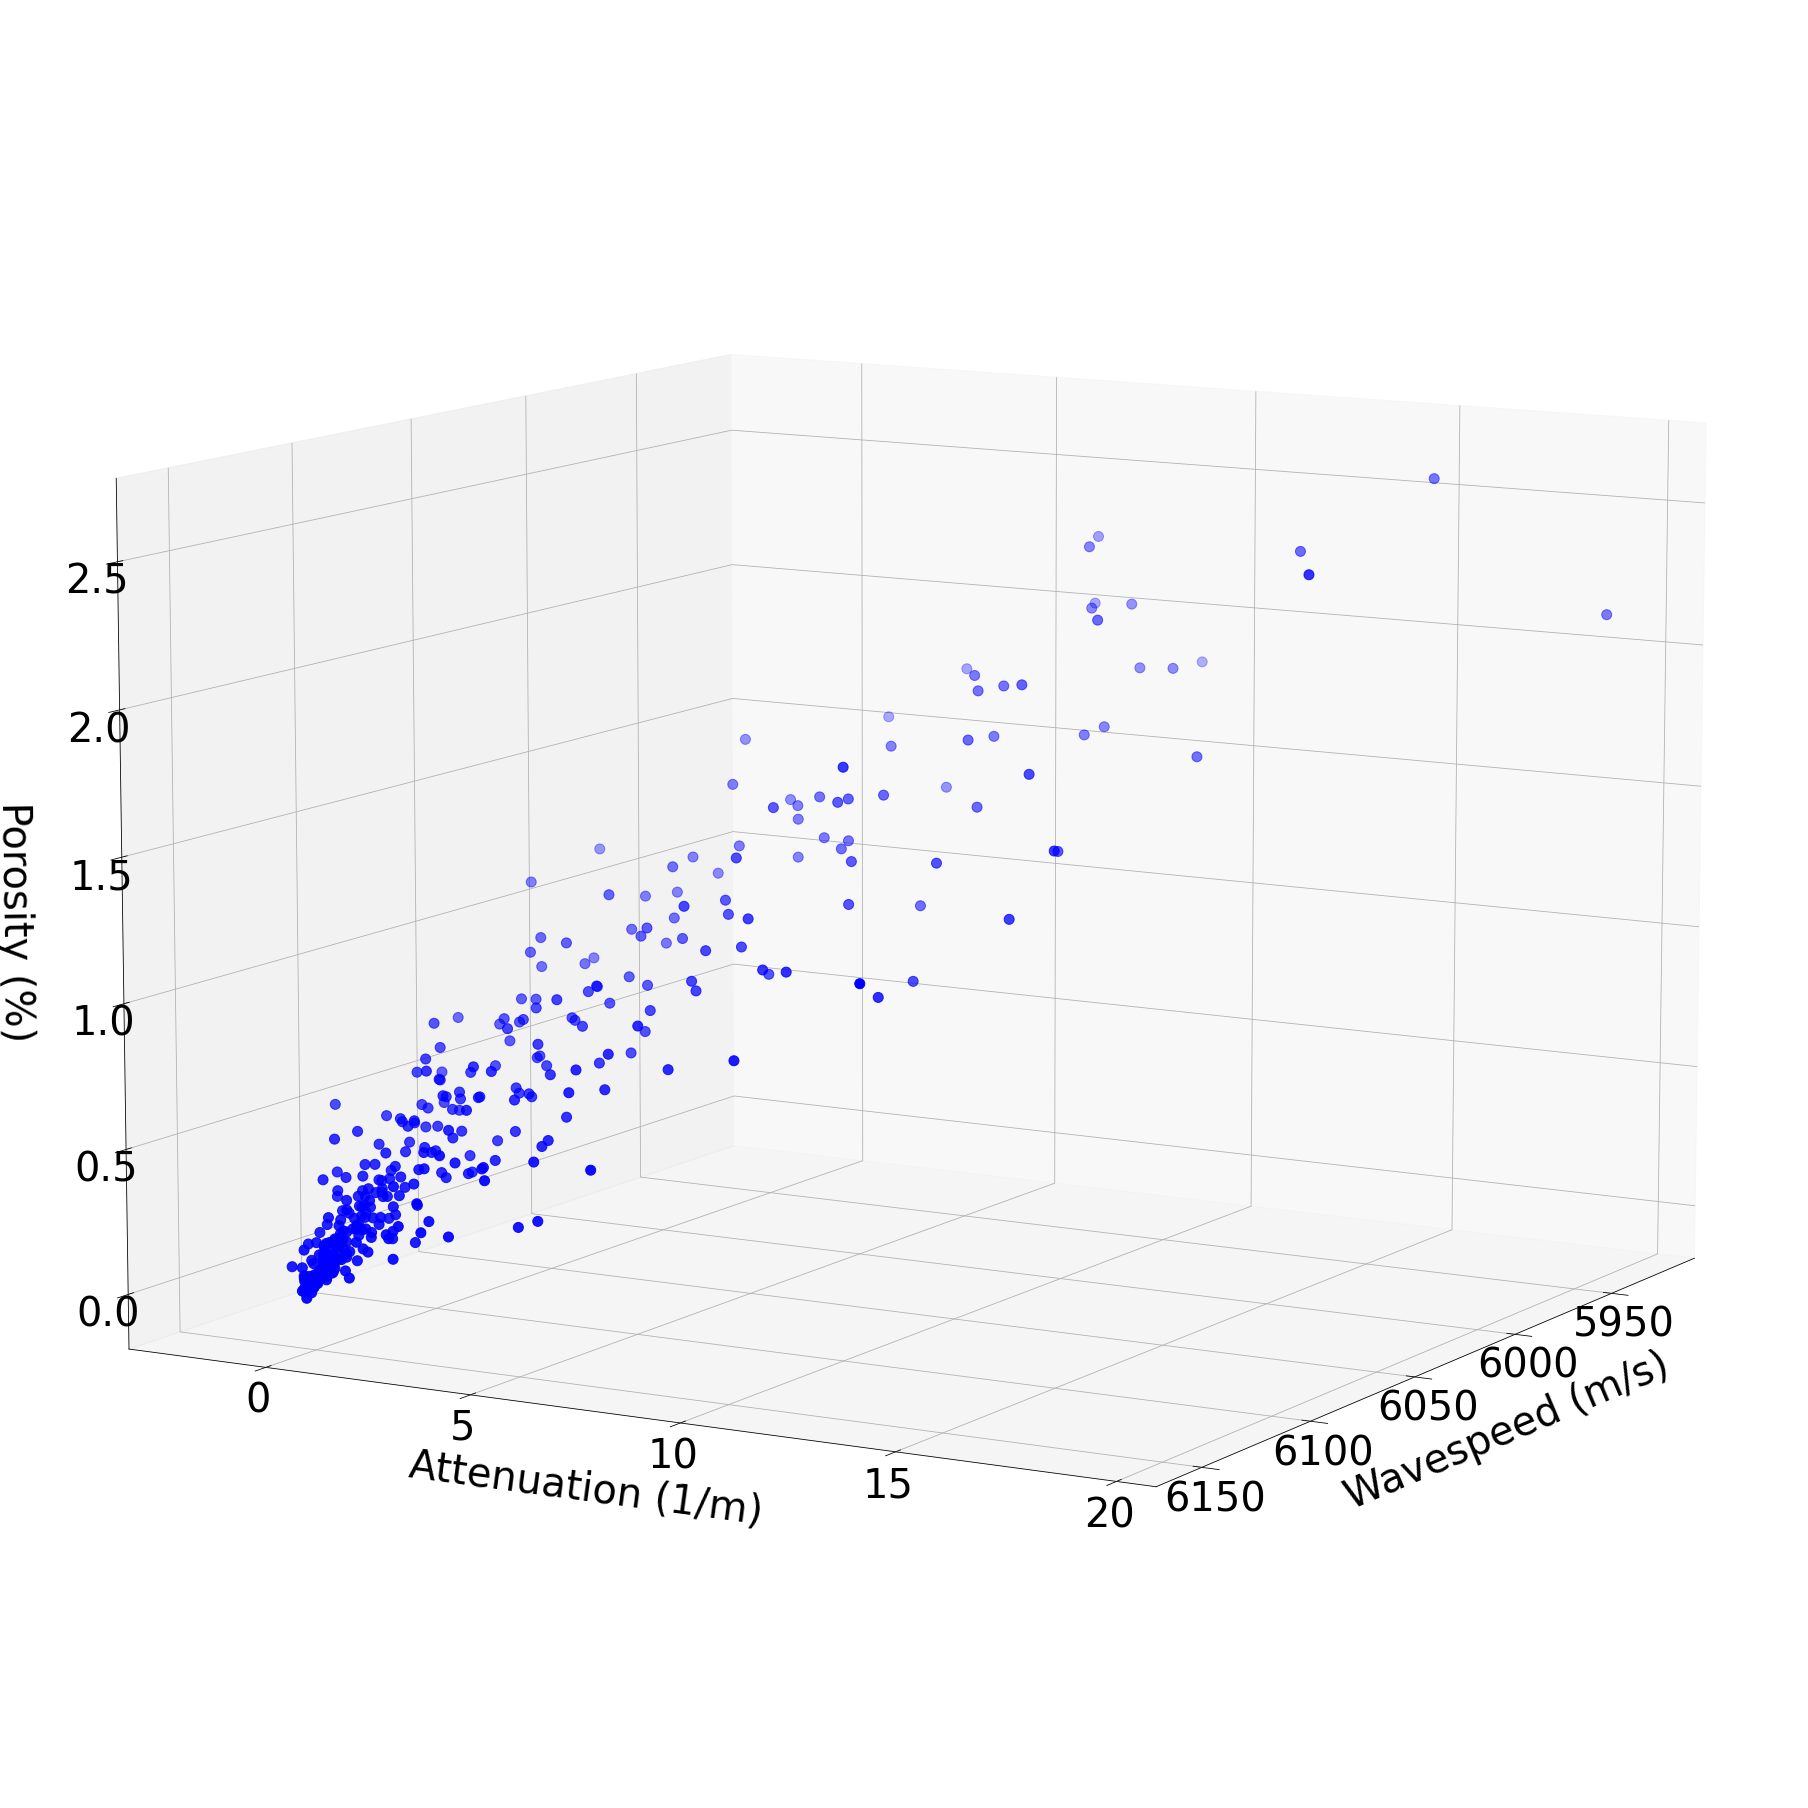

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Linear regression/'

data = np.loadtxt('{}data.txt'.format(path))
X = data

info = np.loadtxt('{}info.txt'.format(path))
y = info
y = y.reshape(-1, 1)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
fig.set_size_inches(33, 33)

ax.scatter(X[:, 0], X[:, 1], y, color = 'blue', s = 100)

ax.tick_params(axis='both', which='major', labelsize=40)
ax.set_xlabel('Wavespeed (m/s)', labelpad = 40, fontsize = 40)
ax.set_ylabel('Attenuation (1/m)', labelpad = 40, fontsize = 40)
ax.set_zlabel('Porosity (%)', labelpad = 40, fontsize = 40)
ax.view_init(elev = 10, azim = 30)

fig.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)

SPLIT THE DATA IN TRAINING AND TESTING DATASETS

In [ ]:
seed = 1234 #Define random seed for the shuffling of data
test_size = 0.2 #Define the percentage of testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, shuffle=True)


y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

SCALE DATA

In [ ]:
scalerX = MinMaxScaler((0, 1))

X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

scalery = MinMaxScaler((0, 1))

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

INITIALIZE LINEAR REGRESSION MODEL 

In [ ]:
lr = 1e-2 # Learning rate for gradient descent
n_iters = 1000 # Number of iterations to perform gradient descent 
model = LinearRegression(lr, n_iters)

FIT THE LINEAR REGRESSION MODEL

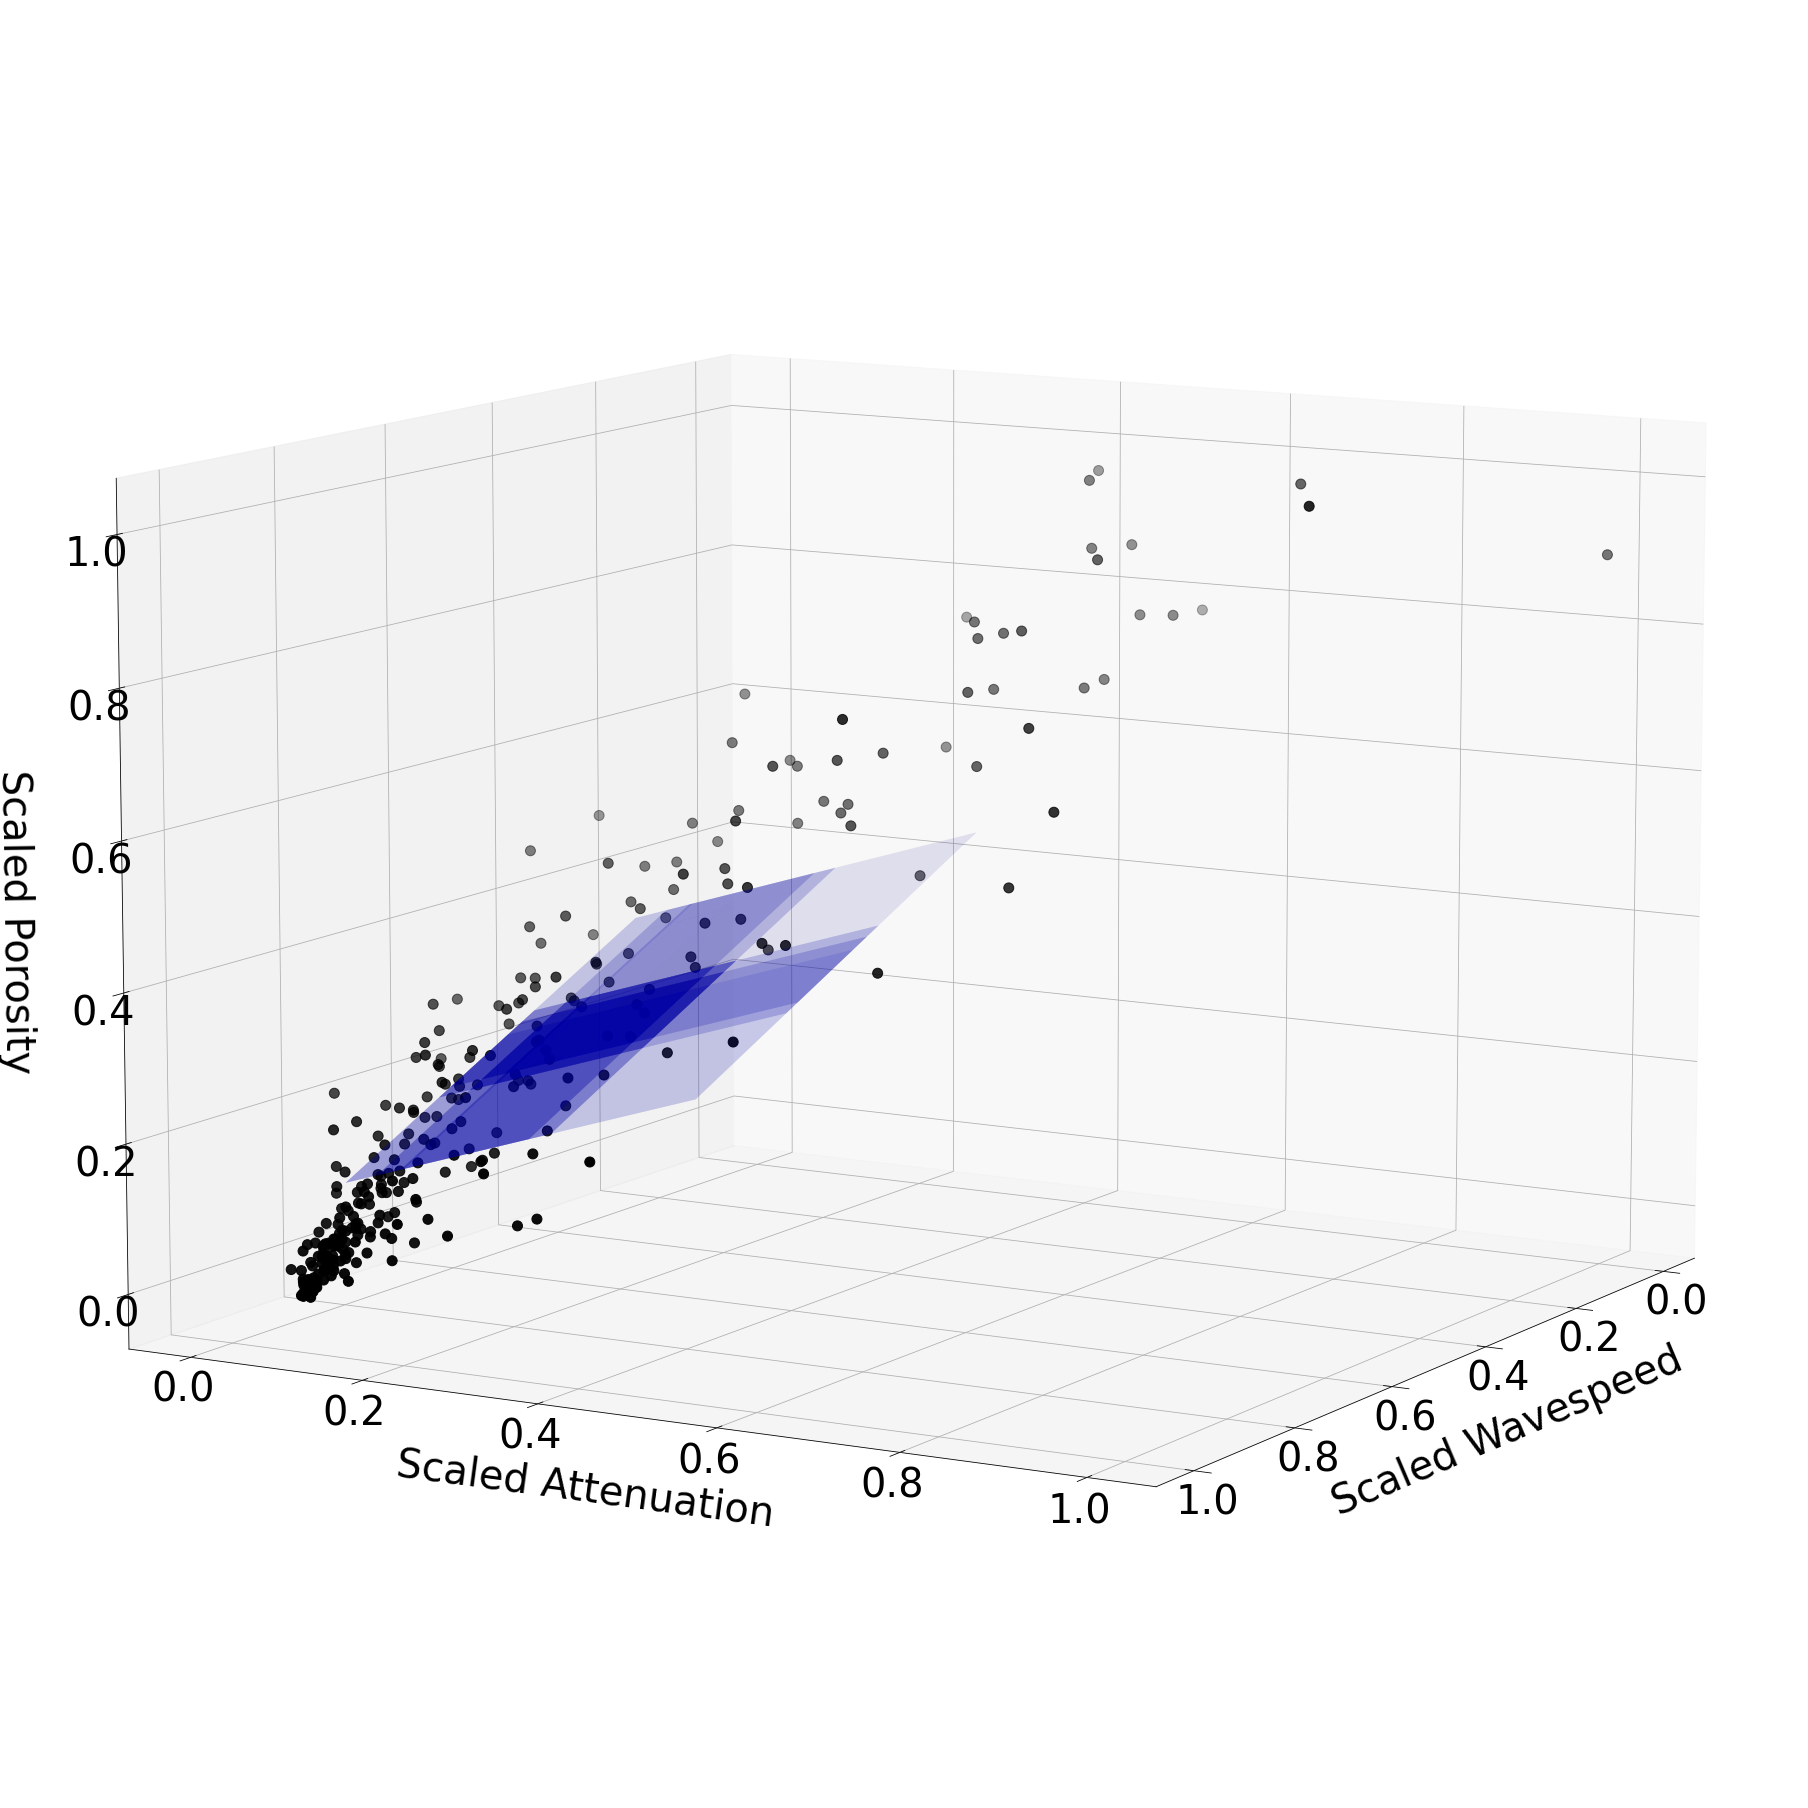

In [ ]:
model.fit(X_train, y_train)
model.plot_plane(X_train, y_train)

PREDICT USING THE TESTING DATASET

In [ ]:
y_pred_test = model.predict(X_test)

PLOT TESTING DATA WITH THE PREDICTED PLANE

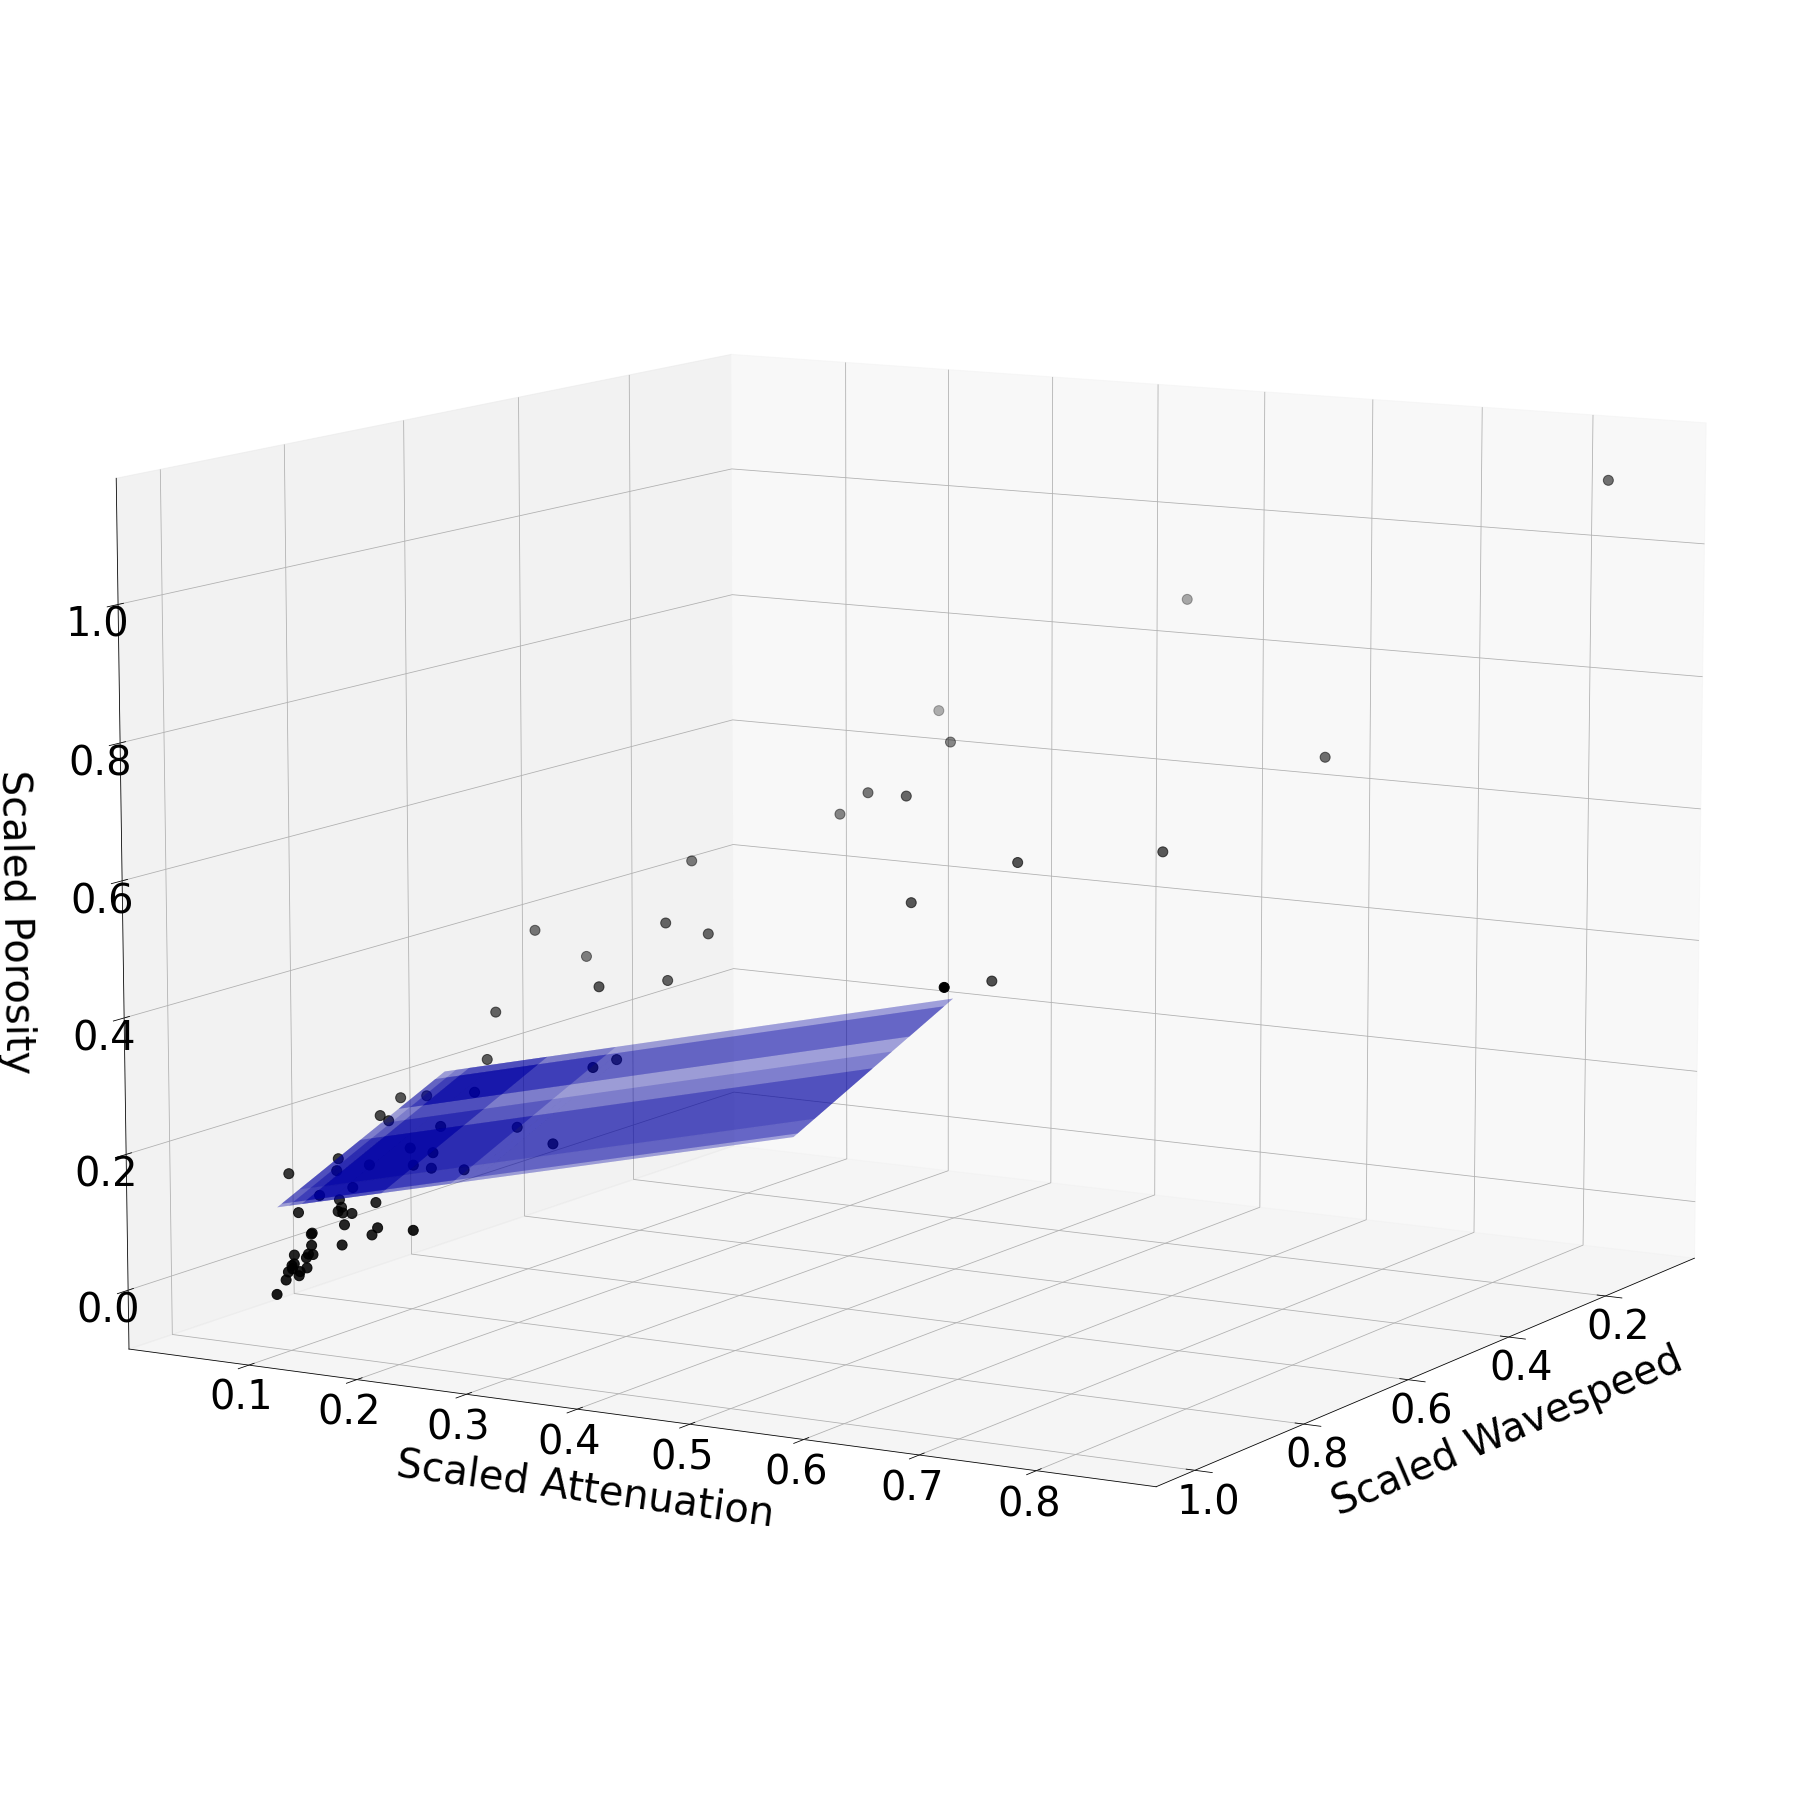

In [ ]:
model.plot_plane(X_test, y_test)

CALCULATE ADJUSTED R2 SCORE FOR TRAINING AND TESTING

In [ ]:
adjusted_R2score_train = model.adjusted_R2score(X_train, y_train)
adjusted_R2score_test = model.adjusted_R2score(X_test, y_test)

print("The adjusted R2-score for training is ", adjusted_R2score_train)
print("The adjusted R2-score for testing is ", adjusted_R2score_test)

The adjusted R2-score for training is  0.8197636916926303
The adjusted R2-score for testing is  0.8450980512645176


CALCULATE RSS FOR TRAINING AND TESTING

In [ ]:
RSS_train = model.RSS(X_train, y_train)
RSS_test = model.RSS(X_test, y_test)

print("The RSS for training is ", RSS_train)
print("The RSS for testing is ", RSS_test)

The RMSE for training is  2.8543933127261063
The RMSE for testing is  0.6152225027545499
